# O que este notebook te mostra:

- Nomes e quantidade das classes (glioma, meningioma, pituitary);

- Quantidade total de imagens em treino e validação;

- Visualização de amostras aleatórias (para confirmar redimensionamento e rótulo);

- Distribuição das classes (para checar se está balanceado).

## Imports

In [1]:
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append(os.path.abspath('..'))

In [12]:
from src import convert_mat_to_images
from src import create_data_generators

## .mat to .png 

In [4]:
convert_mat_to_images(
    mat_dir='../data/matlab_raw',
    output_dir='../data/raw'
)

Encontrados 3064 arquivos .mat


  0%|          | 0/3064 [00:00<?, ?it/s]

100%|██████████| 3064/3064 [01:20<00:00, 37.99it/s]

Conversão concluída!


## Dataset & Generators

In [5]:
dataset_path = '../data/raw'

In [6]:
train_gen, val_gen = create_data_generators(dataset_path)

Found 2452 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [7]:
print(f'Classes encontradas: {train_gen.class_indices}')
print(f'Total de imagens de treino: {train_gen.samples}')
print(f'Total de imagens de validação: {val_gen.samples}')

Classes encontradas: {'glioma': 0, 'meningioma': 1, 'pituitary': 2}
Total de imagens de treino: 2452
Total de imagens de validação: 612


## View some images

In [8]:
x_batch, y_batch = next(train_gen)

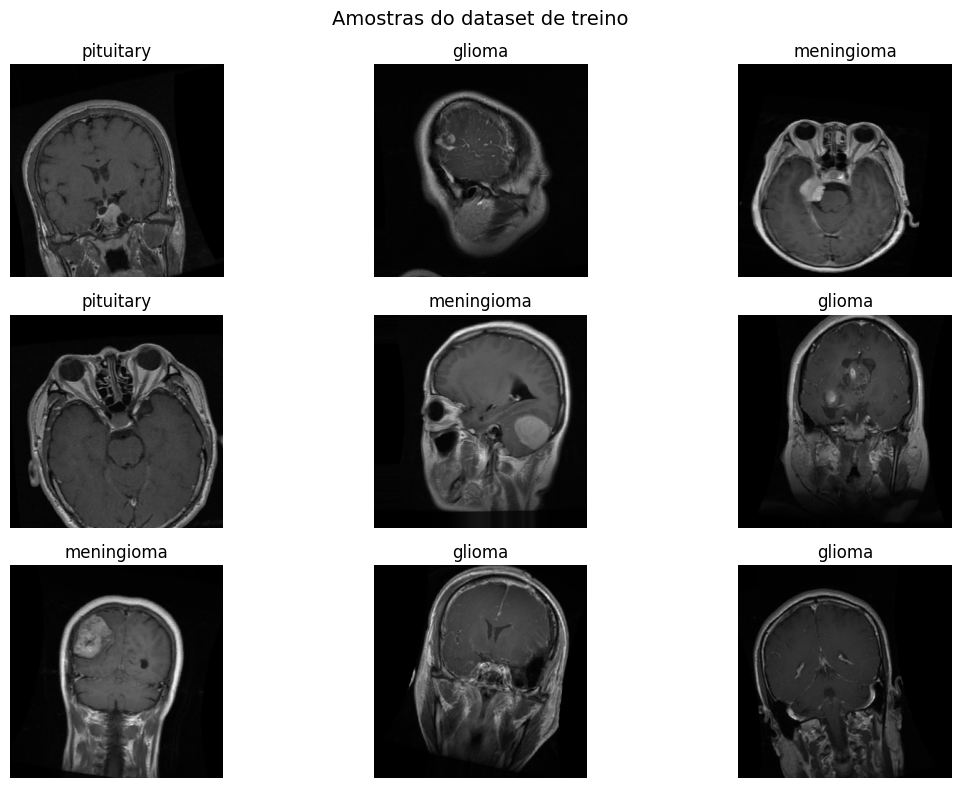

In [9]:
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    label = list(train_gen.class_indices.keys())[y_batch[i].argmax()]
    plt.title(label)
    plt.axis('off')

plt.suptitle('Amostras do dataset de treino', fontsize=14)
plt.tight_layout()
plt.show()

## Class distribution

In [10]:
train_labels = train_gen.classes
val_labels = val_gen.classes

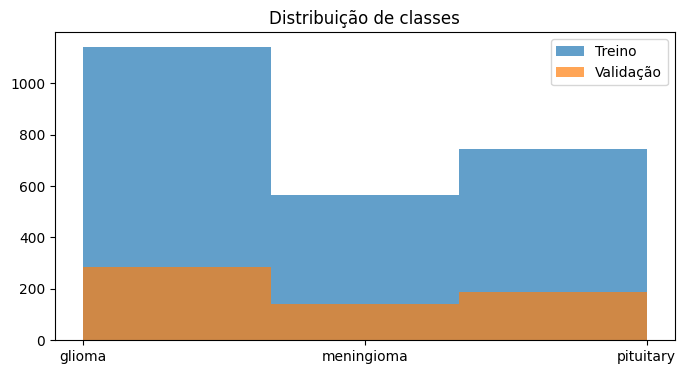

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=len(train_gen.class_indices), alpha=0.7, label='Treino')
plt.hist(val_labels, bins=len(val_gen.class_indices), alpha=0.7, label='Validação')
plt.xticks(range(len(train_gen.class_indices)), list(train_gen.class_indices.keys()))
plt.title('Distribuição de classes')
plt.legend()
plt.show()